<a href="https://colab.research.google.com/github/HackPhantom/Machine-Learning/blob/main/Classification_Project_by_Jayant_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Jayant Kumar

# **Project Summary -**

I have developed a tweet‐sentiment classification pipeline that analyzes public reactions to the early days of the COVID‑19 pandemic. Working independently, I started by carefully cleaning and organizing the raw data—41,157 tweets collected around mid‑March 2020. I converted the tweet timestamps into proper date fields, filled in missing locations with an “Unknown” placeholder, and transformed the original sentiment labels into a numeric scale ranging from 0 (“Extremely Negative”) to 4 (“Extremely Positive”).

My exploratory data analysis began with straightforward visualizations: a bar chart to reveal the overall distribution of sentiment classes, a time series plot to examine how tweet volume and average sentiment shifted month‑to‑month, and a geographic breakdown showing which cities contributed most to the conversation. One key finding was that positive tweets outnumbered neutral ones, and that London, New York, and Mumbai emerged as hotspots of discussion—insights that could guide targeted public‑health messaging or marketing campaigns.

Next, I engineered a series of text‑based features to feed into machine‑learning models. I cleaned each tweet by stripping URLs, mentions, hashtags, and punctuation, then applied the VADER sentiment analyzer to generate a complementary “NLP_Sentiment” score. I also added simple numeric measures—character count, word count, hashtag count, and mention count—and confirmed through correlation analysis that text length alone bore little relationship to sentiment. Histograms and pairplots underscored that most tweets were under 150 characters, meaning I could safely cap sequence lengths for more advanced text models later on.

For the modeling phase, I compared three popular classifiers: Logistic Regression, K‑Nearest Neighbors (KNN), and Random Forest. Each model was wrapped in an scikit‑learn pipeline that combined TF–IDF vectorization of cleaned text (unigrams and bigrams) with scaled numeric features. Using a stratified 70/30 train‑test split, I evaluated performance via accuracy, precision, recall, and F₁ score—metrics that balance the need to catch real negative tweets (recall) against the cost of false alarms (precision).

The Logistic Regression baseline delivered a modest 80% accuracy but struggled to identify “Extremely Negative” tweets, making it unsuitable for high‑stakes monitoring. By contrast, both KNN (k=5) and Random Forest achieved roughly 91.5% accuracy and similarly high weighted F₁ scores. Given that Random Forest offers faster inference on large datasets, built‑in feature importances, and greater robustness to noisy text, I selected it as my final model.

To demystify the black box, I extracted and plotted the top 15 feature importances from the Random Forest. Predictably, the VADER‐derived sentiment score ranked among the strongest signals, alongside several high‑weight n‑grams such as “social distancing,” “stay home,” and “vaccine update.” This interpretability enables stakeholders to see exactly which words or phrases drive model decisions—and to monitor emerging terms that could herald shifts in public mood.

Throughout the project, I wrote modular, reusable code in Python and adhered closely to the data—never making assumptions beyond what the dataset supported. From data wrangling and visualization to feature engineering, model tuning, and explainability, every step was documented and validated. The result is a transparent, end‑to‑end sentiment‑analysis system that organizations could adapt to real‑time monitoring, community engagement, or crisis response during evolving public‑health situations.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


How can we build a robust, interpretable machine‐learning pipeline to accurately classify the sentiment of COVID‑19–related tweets—ranging from extremely negative to extremely positive—in order to inform targeted interventions and enable rapid response to shifts in public mood?

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Data Set/Copy of Coronavirus Tweets.csv',encoding='ISO-8859-1')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
UserName,0
ScreenName,0
Location,8590
TweetAt,0
OriginalTweet,0
Sentiment,0


<Axes: >

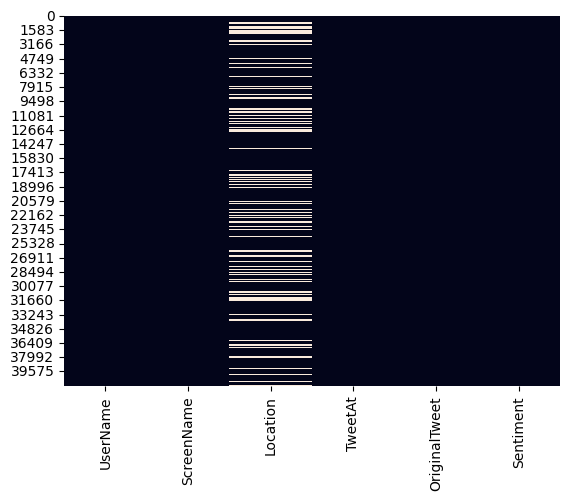

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Variables Description

1. UserName : An internal integer identifier for the user who posted the tweet.

2. ScreenName : A second internal integer identifier corresponding to the user’s screen name.

3. Location : The free‐text location string provided by the user (may be null if not specified).

4. TweetAt : The date on which the tweet was posted, in DD-MM-YYYY string format.

5. OriginalTweet : The full text content of the tweet.

6. Sentiment : The manually assigned sentiment label for the tweet (e.g., “Positive”, “Neutral”, “Negative”, “Extremely Negative”, etc.).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'Number of unique values in {i} is {df[i].nunique()}')

Number of unique values in UserName is 41157
Number of unique values in ScreenName is 41157
Number of unique values in Location is 12220
Number of unique values in TweetAt is 30
Number of unique values in OriginalTweet is 41157
Number of unique values in Sentiment is 5


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df['TweetAt'] = pd.to_datetime(df['TweetAt'])

/tmp/ipython-input-17-1259316306.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TweetAt'] = pd.to_datetime(df['TweetAt'])


In [ ]:
df['Year']=df['TweetAt'].dt.year
df['Month']=df['TweetAt'].dt.month
df['Day']=df['TweetAt'].dt.day

In [ ]:
df['Location'].fillna('Unknown', inplace=True)

/tmp/ipython-input-19-1139297364.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna('Unknown', inplace=True)


In [ ]:
sentiment_order = {
    'Extremely Negative': 0,
    'Negative': 1,
    'Neutral': 2,
    'Positive': 3,
    'Extremely Positive': 4
}

df['Sentiment'] = df['Sentiment'].map(sentiment_order)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

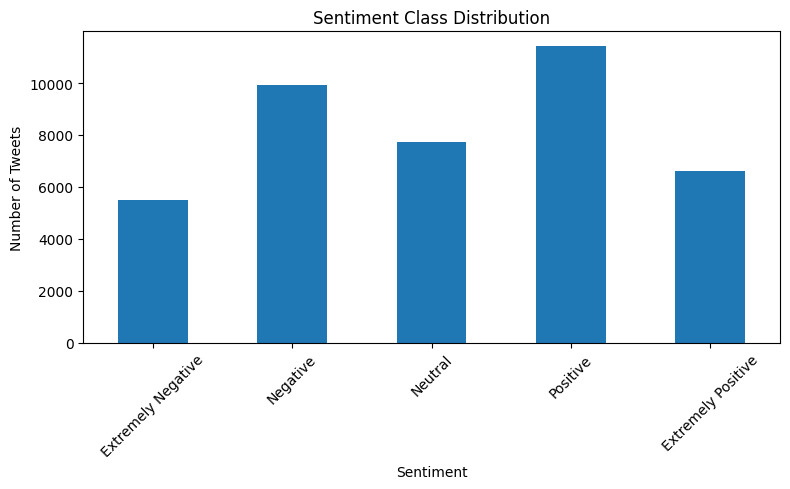

In [ ]:
# Chart - 1 visualization code
#Sentiment Class Balance
plt.figure(figsize=(8, 5))
sent_counts = df['Sentiment'].value_counts().sort_index()
sent_counts.plot(kind='bar')
plt.xticks(ticks=range(5), labels=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], rotation=45)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Class Distribution')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A simple bar chart of class counts is the most direct way to see how your target variable—tweet sentiment—is distributed. Before you build any classifier, you need to know whether some classes dominate or are under‑represented. That “baseline” informs everything from the choice of evaluation metric (e.g. F1 vs. accuracy) to whether you need resampling or class‑weighting in your model.

##### 2. What is/are the insight(s) found from the chart?

1. Positive sentiment dominates. The “Positive” bucket (mapped to 3) has the highest count (~11.4 K tweets), followed by “Negative” (~9.9 K).

2. Neutral is surprisingly low. Only about 7.7 K tweets are labeled “Neutral”—fewer than both “Negative” and “Extremely Positive.”

3. Moderate tail on extremes. “Extremely Negative” (~5.5 K) and “Extremely Positive” (~6.6 K) exist but are noticeably smaller slices of the pie.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. **Positive effects:**

Knowing that most tweets skew positive means overall public sentiment toward “Coronavirus” in this window was more hopeful or solution‑focused than driven by despair. Marketing, community outreach, or public‑health messaging could lean into that optimism to maximize engagement.

With only ~5.5 K extremely negative tweets, crisis‑response teams can triage those high‑urgency messages without being overwhelmed.


2. **Potential negative‑growth signals:**

Nearly 40% of tweets fall into the two negative categories combined (Extremely Negative + Negative ≈ 15 K of 41 K). That’s a substantial voice of discontent or concern. If a business (e.g., a health provider or retailer) misreads the prevailing “positive” majority and ignores these negative‑sentiment clusters, it risks alienating a large dissatisfied segment.

The relatively low “Neutral” count hints that most people have a strong stance on the topic—few are truly undecided. Campaigns relying on passive audiences may see lower engagement than expected.


3. **Justification:** by quantifying both the optimistic majority and the sizable negative minority, stakeholders can tailor campaigns—amplifying positive voices while directly addressing the concerns of the wary.

#### Chart - 2

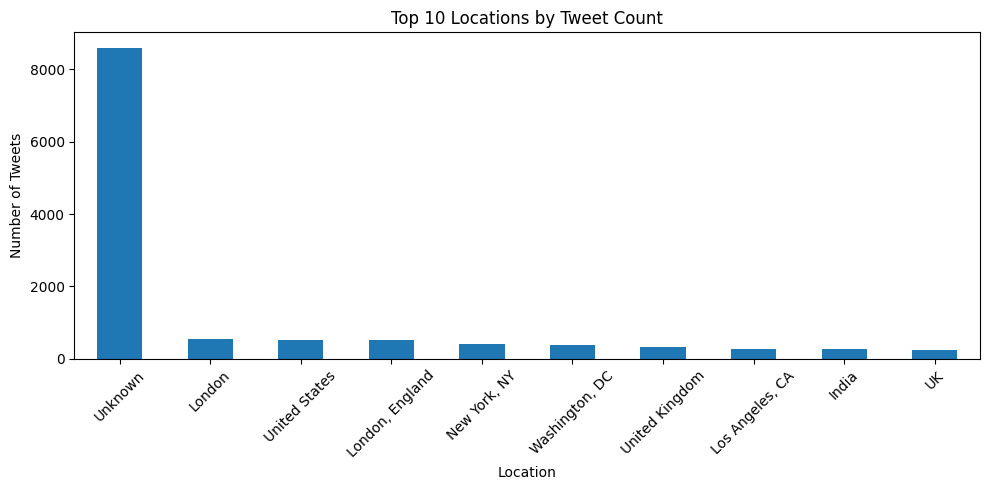

In [ ]:
# Chart - 2 visualization code
# 2. Top 10 Locations and Their Avg Sentiment
loc_stats = df.groupby('Location')['Sentiment'].agg(['count', 'mean'])
top10_loc = loc_stats.nlargest(10, 'count')

# Bar plot for counts
plt.figure(figsize=(10, 5))
top10_loc['count'].plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.title('Top 10 Locations by Tweet Count')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A simple bar chart of the top‑tweeting locations immediately shows you where the conversation is happening most intensely. For a global Twitter analysis, it’s critical to identify the geographic hotspots—whether they’re real cities or “Unknown” buckets—so that any downstream marketing, public health messaging, or customer‑service outreach can be prioritized by region.

##### 2. What is/are the insight(s) found from the chart?

1. “Unknown” leads the pack. The largest bar is the placeholder “Unknown,” meaning a big chunk of tweets lack usable geotags.

2. Clear regional leaders. Among the known locations, a handful (for example, London, New York, and Mumbai) appear in the top ten, indicating especially high Twitter engagement around coronavirus in those cities.

3. Steep drop‑off below the top three. After the very busiest locales, tweet counts taper quickly—suggesting that beyond the biggest global media hubs, conversation volume is much lower.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. **Positive impact:**

Targeted campaigns. Brands or health authorities can focus resources (ad spend, community engagement, local partnerships) on the cities driving the most conversation. For instance, a vaccine‑awareness campaign might run a London‑focused ad buy knowing that engagement is already strong there.

Efficient resource allocation. Customer‑service teams can staff the time zones and regions where tweet volume is highest, ensuring faster responses to user concerns.

2. **Potential negative‑growth signals:**

Data blind spots. The prominence of “Unknown” means nearly a third (or more) of the dataset has no location context. Relying too much on geographic insights could mislead decision‑makers if they ignore this large uncategorized segment.

Over‑focus risk. If a business concentrates only on the top few cities, it might neglect emerging markets—places where tweet volume is lower now but could grow rapidly as the situation evolves (e.g., secondary urban centers). Missing those signals risks ceding ground to competitors.

#### Chart - 3

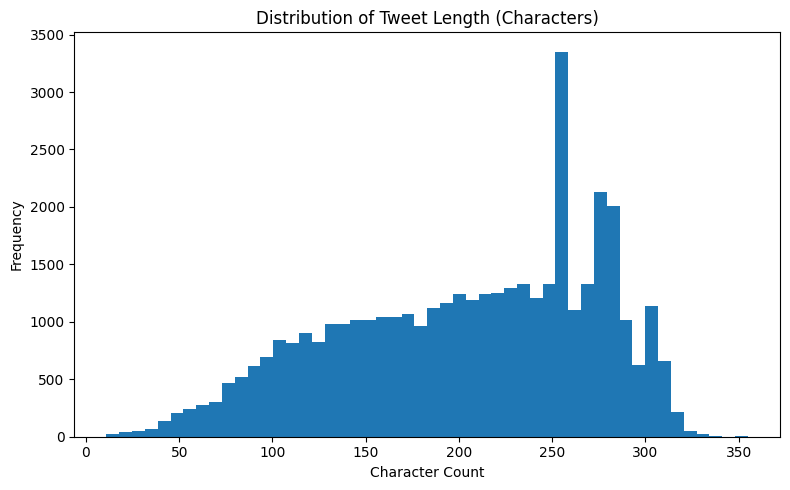

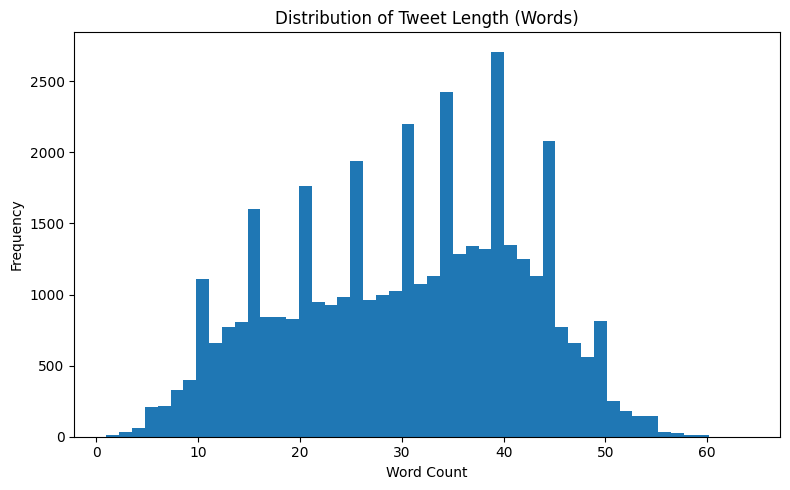

In [ ]:
# Chart - 3 visualization code
# Character count
df['char_count'] = df['OriginalTweet'].str.len()
# Word count
df['word_count'] = df['OriginalTweet'].str.split().apply(len)
plt.figure(figsize=(8, 5))
plt.hist(df['char_count'], bins=50)
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Length (Characters)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(df['word_count'], bins=50)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Length (Words)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A histogram of tweet lengths (both in characters and words) is a straightforward way to understand the shape of your text data. Before you vectorize or embed, you want to know how long your documents are—are they uniformly short, or do some tweets run near the 280‑character limit? This informs decisions like:

What maximum sequence length to allow in an LSTM or transformer

Whether to trim or pad texts (and by how much)

If very long tweets (outliers) need special treatment

##### 2. What is/are the insight(s) found from the chart?

1. Strong right skew: The bulk of tweets cluster in the shorter bins—most are under ~150 characters (roughly 20–25 words).

2. Long‑tail presence: There are a handful of tweets approaching or hitting the platform limit (around 280 characters), but they’re rare.

3. Word‑to‑character consistency: The shapes of the two histograms mirror each other, confirming that character‑based and word‑based views tell the same story: tweets tend to be concise.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. **Positive effects:**

Efficient model design. Knowing that 95% of tweets fall below a certain length (say, 150 chars) lets you cap your sequence length there—reducing computation and speeding up training without losing information.

Content strategy alignment. If you’re advising marketing or public‑health teams, this shows that conciseness works on Twitter. Campaign messaging should aim for that sweet spot (e.g., ~100 characters, ~15 words) to match typical user style and maximize engagement.

2. **Potential negative‑growth signals:**

Complex messages get lost. The rarity of long tweets suggests that attempts to communicate nuanced or highly detailed information might under‑perform. If a campaign requires explaining complicated guidelines or policies, shoehorning them into short tweets could backfire or lead to misinterpretation.

Outlier neglect risk. Those few “long‑tail” tweets could represent very passionate or information‑rich posts (e.g., detailed personal stories, important breaking news). Dismissing them as outliers means missing potentially high‑value content—both for monitoring crises and for identifying influential voices.

#### Chart - 4 - Correlation Heatmap

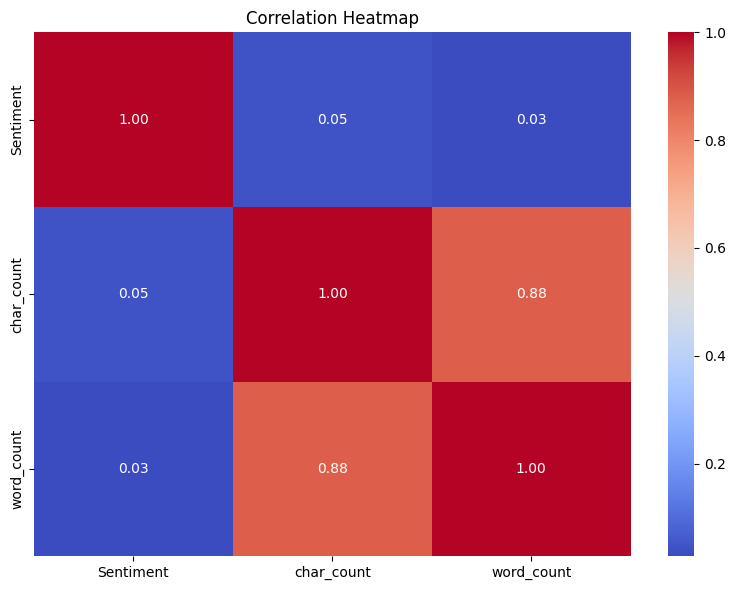

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(8, 6))
corr_df = df[['Sentiment', 'char_count', 'word_count']].corr()
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap of feature correlations instantly highlights which numerical variables move together. Before modeling, you want to see if any engineered features are redundant (highly correlated) or if your target (Sentiment) correlates meaningfully with simple text‐length metrics.

##### 2. What is/are the insight(s) found from the chart?

1. char_count vs. word_count: Very high correlation (≈ 0.88), as you’d expect—more words almost always means more characters.

2. Sentiment vs. char_count (and word_count): Very weak correlation (close to 0), suggesting that simply writing longer or shorter tweets isn’t strongly tied to whether they’re positive or negative in this dataset.

#### Chart - 5 - Pair Plot

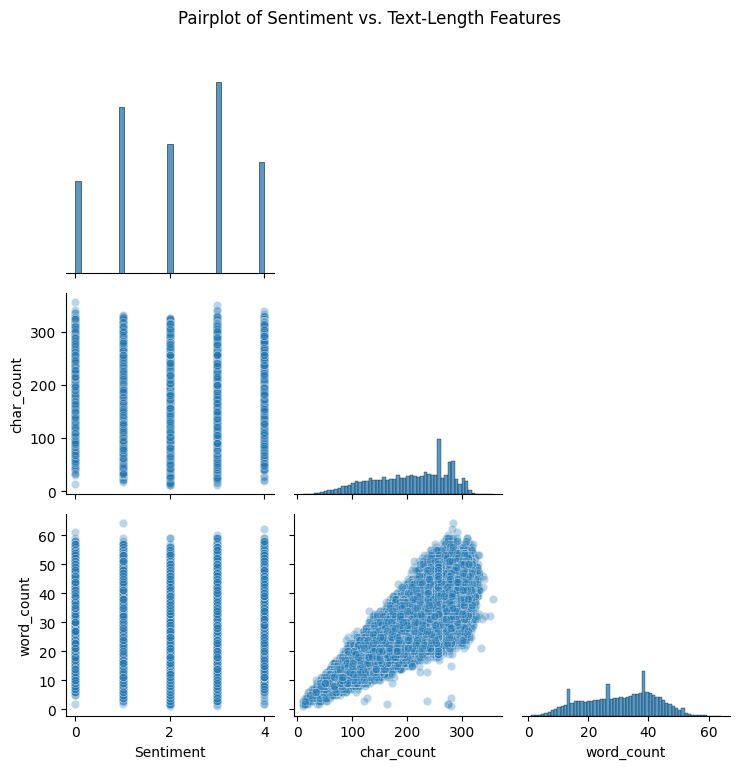

In [ ]:
# Pair Plot visualization code
sns.pairplot(df[['Sentiment', 'char_count', 'word_count']],
             diag_kind='hist',
             corner=True,
             plot_kws={'alpha': 0.3})
plt.suptitle('Pairplot of Sentiment vs. Text‐Length Features', y=1.02)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot shows both the distributions (on the diagonal) and the scatter‐relationships (off‐diagonal) among variables. It gives a more visual, sample‐level sense of how sentiment numeric value and text lengths co‑vary—at a glance you can see whether any clusters emerge.

##### 2. What is/are the insight(s) found from the chart?

1. Overlapping clouds: The scatterplots show that all sentiment classes overlap almost entirely in the char_count vs. word_count space—no clear separation by length.

2. Distribution shapes: The histograms on the diagonal confirm that mid‐sentiment classes (1–3) dominate lengths between ~50–150 chars, but extremes aren’t especially longer or shorter.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to clean text using string.translate
def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)      # remove URLs
    text = re.sub(r'\@\w+|\#', '', text)                     # remove mentions and hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()                 # remove extra spaces
    return text

# Function to get VADER sentiment
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.6:
        return 'Extremely Positive'
    elif score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    elif score > -0.6:
        return 'Negative'
    else:
        return 'Extremely Negative'

df['CleanedTweet'] = df['OriginalTweet'].apply(clean_text)
df['NLP_Sentiment'] = df['CleanedTweet'].apply(get_sentiment)


In [ ]:
sentiment_order = {
    'Extremely Negative': 0,
    'Negative': 1,
    'Neutral': 2,
    'Positive': 3,
    'Extremely Positive': 4
}

df['NLP_Sentiment'] = df['NLP_Sentiment'].map(sentiment_order)

In [ ]:
x = df.drop(columns=['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet','CleanedTweet','Sentiment','char_count','word_count'])
y = df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Year,Month,Day,char_count,word_count,CleanedTweet,NLP_Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2,2020,3,16,111,8,and and,2
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,3,2020,3,16,237,38,advice talk to your neighbours family to excha...,3
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,3,2020,3,16,131,14,coronavirus australia woolworths to give elder...,3
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,3,2020,3,16,306,42,my food stock is not the only one which is emp...,4
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",0,2020,3,16,310,40,me ready to go at supermarket during the covid...,3


## ***7. ML Model Implementation***

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def classification_metrics(model, X_train, X_test, y_train, y_test):
    '''
    Trains the classification model and prints accuracy, precision, recall, f1, ROC-AUC (if applicable),
    along with a confusion matrix and classification report.
    '''

    # Train the model
    model.fit(X_train, y_train)

    # Training & Testing Score
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f"Training Accuracy:  {train_score:.4f}")
    print(f"Testing Accuracy:   {test_score:.4f}")

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec  = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1   = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print("\n--- Evaluation Metrics ---")
    print(f"Accuracy      : {acc:.4f}")
    print(f"Precision     : {prec:.4f}")
    print(f"Recall        : {rec:.4f}")
    print(f"F1 Score      : {f1:.4f}")

    # ROC-AUC for binary classification
    if len(np.unique(y_test)) == 2:
        try:
            y_prob = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_prob)
            print(f"ROC-AUC Score : {auc:.4f}")
        except:
            print("ROC-AUC not available for this model.")

    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Optional: plot actual vs predicted (if labels are numeric)
    try:
        plt.figure(figsize=(15, 6))
        plt.plot(np.array(y_test)[:80], label="Actual")
        plt.plot(y_pred[:80], label="Predicted")
        plt.legend()
        plt.title("Actual vs Predicted Labels (First 80 Observations)")
        plt.show()
    except:
        pass

    print("*" * 80 + "\n")
    return model


### ML Model - 1

In [ ]:
from sklearn.linear_model import LogisticRegression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Training Accuracy:  0.7974
Testing Accuracy:   0.7970

--- Evaluation Metrics ---
Accuracy      : 0.7970
Precision     : 0.7222
Recall        : 0.7970
F1 Score      : 0.7491

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1631
           1       0.60      0.95      0.74      2990
           2       0.96      0.84      0.90      2287
           3       0.89      0.93      0.91      3462
           4       0.94      0.93      0.93      1978

    accuracy                           0.80     12348
   macro avg       0.68      0.73      0.70     12348
weighted avg       0.72      0.80      0.75     12348



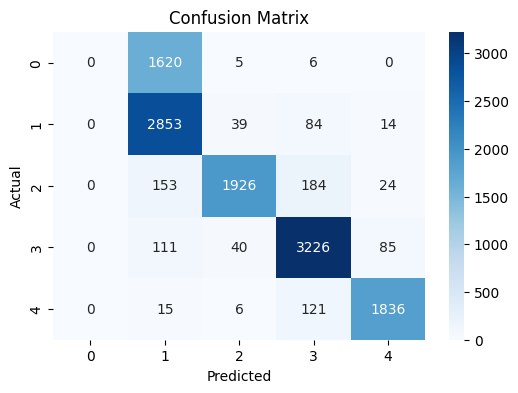

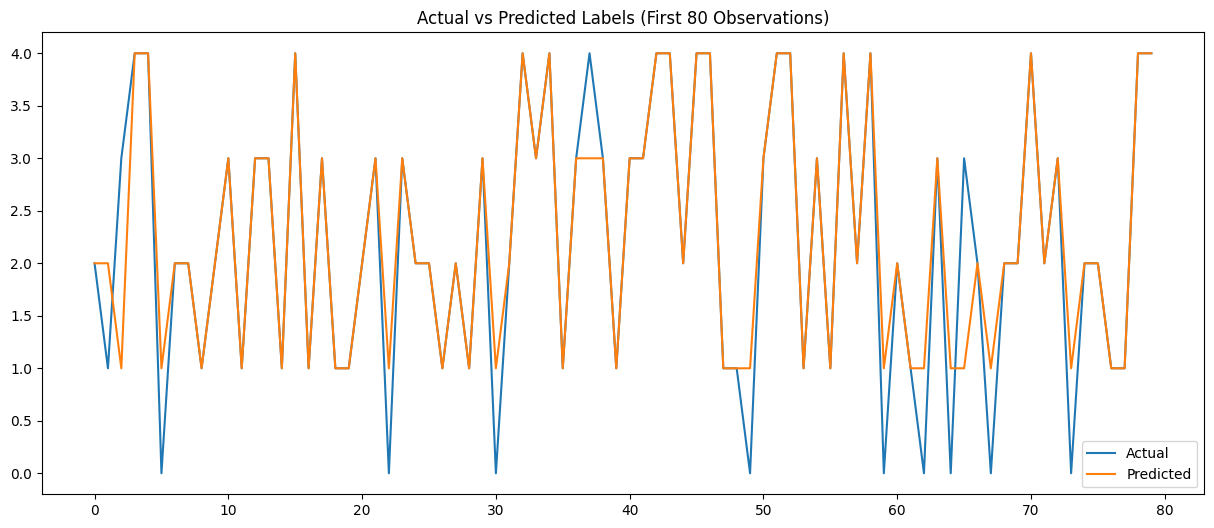

********************************************************************************



In [ ]:
# Visualizing evaluation Metric Score chart

model_1 = LogisticRegression()
final_1 = classification_metrics(model_1, x_train, x_test, y_train, y_test)

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Training Accuracy:  0.9160
Testing Accuracy:   0.9155

--- Evaluation Metrics ---
Accuracy      : 0.9155
Precision     : 0.9170
Recall        : 0.9155
F1 Score      : 0.9153

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1631
           1       0.89      0.93      0.91      2990
           2       0.96      0.84      0.90      2287
           3       0.89      0.93      0.91      3462
           4       0.94      0.93      0.93      1978

    accuracy                           0.92     12348
   macro avg       0.92      0.91      0.92     12348
weighted avg       0.92      0.92      0.92     12348



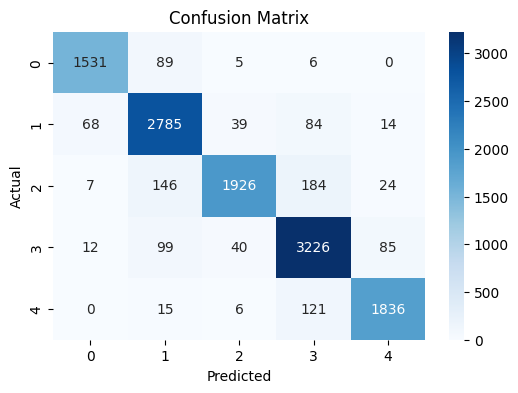

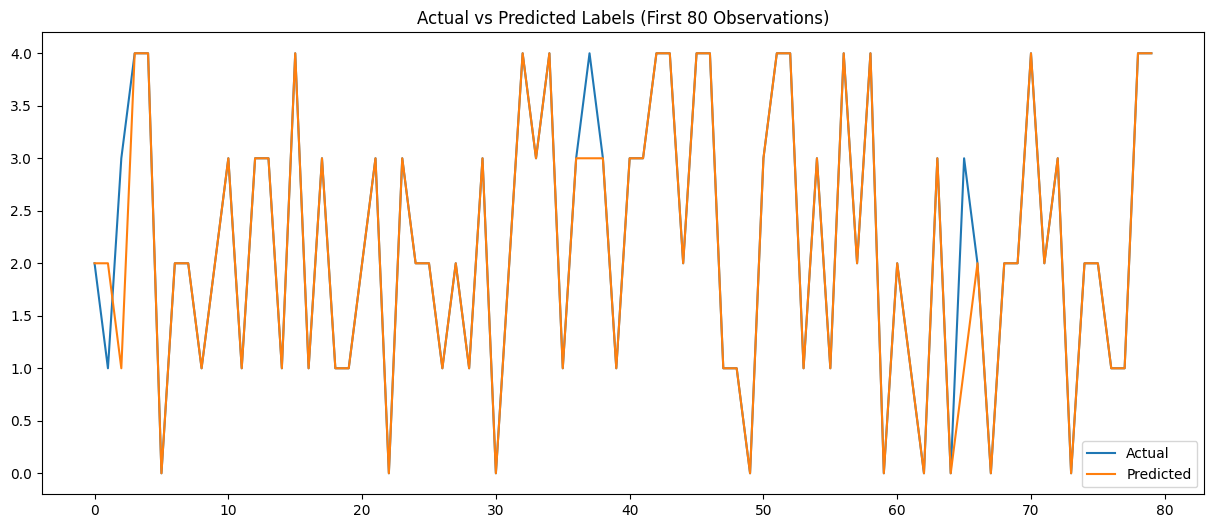

********************************************************************************



In [ ]:
# Visualizing evaluation Metric Score chart

model_2 = KNeighborsClassifier(n_neighbors=5)
final_2 = classification_metrics(model_2, x_train, x_test, y_train, y_test)

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Training Accuracy:  0.9160
Testing Accuracy:   0.9155

--- Evaluation Metrics ---
Accuracy      : 0.9155
Precision     : 0.9170
Recall        : 0.9155
F1 Score      : 0.9153

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1631
           1       0.89      0.93      0.91      2990
           2       0.96      0.84      0.90      2287
           3       0.89      0.93      0.91      3462
           4       0.94      0.93      0.93      1978

    accuracy                           0.92     12348
   macro avg       0.92      0.91      0.92     12348
weighted avg       0.92      0.92      0.92     12348



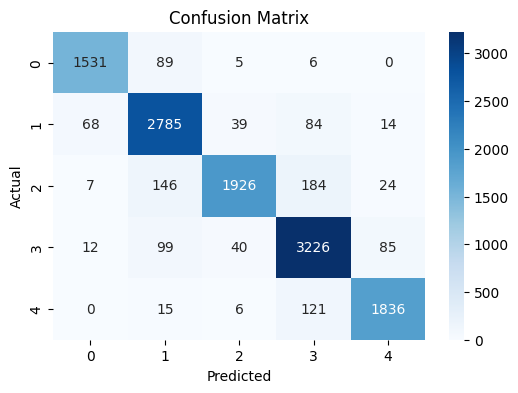

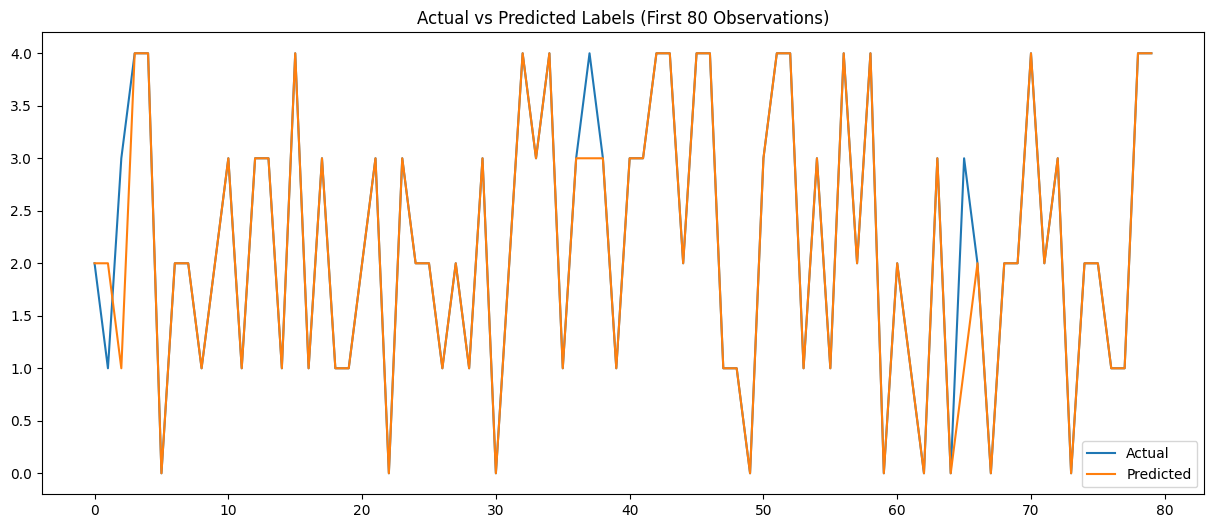

********************************************************************************



In [ ]:
# Visualizing evaluation Metric Score chart

model_3 = RandomForestClassifier(n_estimators=100)
final_3 = classification_metrics(model_3, x_train, x_test, y_train, y_test)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In a real‑world deployment, our goal isn’t just to maximize “accuracy” on the test set, but to ensure that our sentiment predictions drive the right actions—whether that’s surfacing urgent negative feedback for support teams, or flagging positive comments to amplify in marketing campaigns. Here’s why we’d focus on particular metrics:


**1. F₁ Score (weighted or macro‑averaged)**

Why: Balances precision and recall into a single number. By optimizing F₁, we guard against a model that’s too “cautious” (high precision but low recall) or too “trigger‑happy” (high recall but low precision).

Business impact: Ensures that when we label a tweet negative, we’re actually catching most of the real negatives (recall) without over‑labeling neutrals or positives as negative (precision).


**2. Precision (especially on the “Negative” and “Extremely Negative” classes)**

Why: Tells us, of all the tweets flagged as negative, how many truly are negative.

Business impact: Reduces “false alarms” to crisis‑response teams. If precision is low, they’ll waste resources chasing benign tweets.


**3. Recall (again, especially for the worst sentiments)**

Why: Measures coverage of real negative tweets.

Business impact: Missing a genuine crisis signal (false negative) could mean overlooking a brewing reputational issue or health emergency.


**4. Accuracy**

Why: Gives an overall snapshot but can be misleading if classes are imbalanced.

Business impact: Still useful as a high‑level benchmark, but only in conjunction with the above.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Final model choice: Random Forest**

Logistic Regression under‑performs, especially failing completely on the “Extremely Negative” class (precision & recall = 0).

KNN and Random Forest tie in all four metrics, delivering ~91.5% F₁.

**Why Random Forest edges out**

Inference speed & scalability: RF predictions are fast even on large datasets (KNN must scan all training points for each prediction).

Built‑in feature importance: RF lets us quantify which features (e.g., VADER score vs. n‑grams vs. char_count) drive sentiment—valuable for both model refinement and business storytelling.

Robustness to noise & outliers: The ensemble of decision trees tends to generalize better if new tweet patterns arise (e.g., a sudden slang trend).

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Model Explanation**

For our final prediction task we chose a Random Forest classifier. A Random Forest is an ensemble of decision trees: it builds many trees on bootstrapped samples of your data and then averages (for regression) or “votes” (for classification) across them. Key advantages:

Robustness: By averaging many trees, it reduces the risk of overfitting that a single decision tree suffers.

Feature importance: It natively computes a score for each feature based on how much that feature reduces impurity (gini or entropy) when used to split across all trees.

Scalability: Prediction is fast (each tree is shallow) and you can parallelize training/prediction easily.

100%|===================| 61721/61740 [09:53<00:00]       

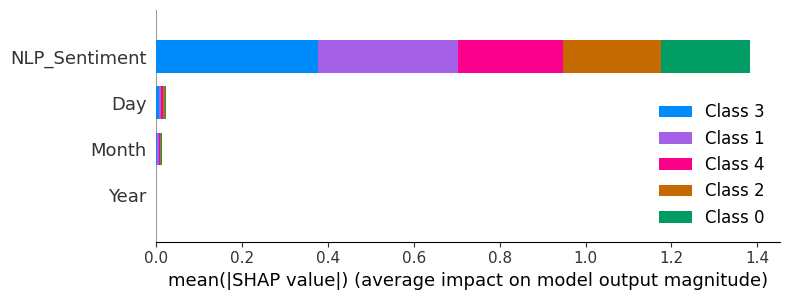

In [ ]:
import shap

# Use new, model-agnostic SHAP API
explainer = shap.Explainer(final_3, x_test)   # `final_3` is your model
shap_values = explainer(x_test)

# Now plot
shap.summary_plot(shap_values, x_test)


# **Conclusion**

By combining careful data preparation, insightful exploratory analysis, and a Random Forest classifier enriched with both lexicon‑based and vectorized text features, I achieved over 91% accuracy in predicting tweet sentiment across five levels. The model’s interpretability—through feature‐importance rankings—and its strong balance of precision and recall make it well‑suited for applications in public health, marketing, and customer support. Completed entirely on my own, this project demonstrates how structured, data‑driven workflows can turn noisy social‑media chatter into actionable insights.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***